In [170]:
import psycopg2
import numpy as np
import pandas as pd

pd.set_option('max_columns', False)
#pd.set_option('max_rows', 20)
pd.reset_option('max_rows')

In [171]:
df = pd.read_csv('D:\Documentos\jmj_projects\correlation_one\Final Project\ofertas.csv', low_memory=False).iloc[:,1:]

In [ ]:
db = 'ofertas'
us = 'team53'
pw = 'CatastroDS4A'
ht = 'ds4a53catastro.cd21iciz5zqe.us-east-2.rds.amazonaws.com'

con = psycopg2.connect(database=db, user=us, password=pw, host=ht)
df = pd.read_sql("select * from datos;", con)

In [172]:
df_1 = df.copy()

In [5]:
df_1.head()

,oft_codigo,lotcodigo,nombre_barrio,oft_tipo_inmueble,oft_tipo_norma_juridica,oic_area_terreno,oic_area_construccion,oic_valor_adm,oic_valor_anexos,oia_tiene_ascensor,oia_cant_garajes,vfventa2020,codigo_con,codigo_res,x,y,d_park,d_highway,d_bikeway,d_ssf,d_mus,d_lib,d_sitp,d_tm,d_p_tm,d_gy,d_ies,d_bom,d_col,d_ips,dm_bikeway,dm_bom,dm_col,dm_gy,dm_highway,dm_ies,dm_ips,dm_lib,dm_mus,dm_park,dm_p_tm,dm_sitp,dm_ssf,dm_tm,loccodigo,locnombre,z,barmanpre,preczhf,suelo,actividad,tratamiento_urb,topografia,serpub,serpub_tipo,serpub_especif,via,clase_via,estado_via,influencia_via,actividad_economica,actividad_economica_tipo,tipo_segun_actividad,manzana_id,cp_terr_ar,avaluo_com,avaluo_cat,log_vfventa2020,estrato,prevetustz
0,338319,9114036002,GILMAR,Apartamento,PH,1.0,154.30,400000.0,0.0,NO,2,8.385538e+08,1.0,9001.0,1.001029e+06,1.016411e+06,0.000000,31.022020,132.624586,102.587985,2797.923570,1356.907787,251.030171,1631.847033,2591.530972,8781.765578,1878.591434,1306.720762,267.330342,632.441985,589.145548,1856.402509,545.193319,10944.909890,111.565198,2492.107311,733.827241,1558.177475,4239.753003,0.000000,4185.200310,432.420139,192.138505,2866.639842,11.0,SUBA,2564.825714,9114036002,6612125153114,6,61,21,2,51,5,1,531,5,3,1,14,1,4,9114036,P,2833333.0,2173704.0,20.547189,5.0,NaN
1,338320,9114036002,GILMAR,Apartamento,PH,1.0,154.30,400000.0,0.0,NO,2,8.980613e+08,1.0,9001.0,1.001029e+06,1.016411e+06,0.000000,31.022020,132.624586,102.587985,2797.923570,1356.907787,251.030171,1631.847033,2591.530972,8781.765578,1878.591434,1306.720762,267.330342,632.441985,589.145548,1856.402509,545.193319,10944.909890,111.565198,2492.107311,733.827241,1558.177475,4239.753003,0.000000,4185.200310,432.420139,192.138505,2866.639842,11.0,SUBA,2564.825714,9114036002,6612125153114,6,61,21,2,51,5,1,531,5,3,1,14,1,4,9114036,P,2833333.0,2173704.0,20.615749,5.0,NaN
2,338321,8312005016,ESPARTILLAL,Oficina,PH,1.0,77.63,692000.0,0.0,SI,2,5.576739e+08,1.0,6002.0,1.002157e+06,1.007369e+06,176.040380,80.395866,262.720201,2535.917825,425.246626,2842.550861,58.876229,335.001609,7184.778515,1734.626853,105.485195,1691.440905,491.935033,6.279318,310.614444,2088.308464,675.004922,2297.591306,141.837730,184.288849,24.179026,3660.671996,622.041676,200.283583,8112.431909,129.976952,3208.664478,582.411375,2.0,CHAPINERO,2565.440497,8312005016,6452315152122,6,45,23,1,51,5,1,521,5,2,1,22,2,2,8312005,N,5800000.0,4930000.0,20.139285,5.0,NaN
3,338323,9124001039,PUENTE LARGO,Apartamento,PH,1.0,94.50,382000.0,0.0,NO,2,4.279725e+08,1.0,3002.0,1.001184e+06,1.011152e+06,39.862132,197.631985,217.813959,3511.786174,2548.295866,2879.444435,201.146286,449.852551,5006.047133,3663.701858,1150.395691,2954.407099,324.595001,155.957758,306.796430,3338.924183,441.317970,4764.539245,288.838433,1391.180606,269.738273,3263.703055,3048.418357,79.298390,6021.974309,422.752810,4345.943404,637.196995,11.0,SUBA,2558.471054,9124001039,6222115152115,6,22,21,1,51,5,1,521,5,2,1,15,1,5,9124001,P,3910586.0,2952398.0,19.874570,5.0,NaN
4,338324,8412054021,SANTA BIBIANA,Apartamento,PH,1.0,128.60,650000.0,0.0,NO,2,1.051021e+09,1.0,5003.0,1.002798e+06,1.010680e+06,109.315253,124.598558,4.642318,3678.832326,1879.858494,4211.971813,142.811580,413.261916,6693.263262,3967.405952,103.326581,4075.981245,279.132676,102.726665,38.278663,4742.141015,560.686525,4552.293612,140.984048,115.379418,163.595361,5387.519156,2594.299510,214.594010,8352.744279,260.115731,4587.553062,2118.277891,1.0,USAQUEN,2552.554726,8412054021,6222215153215,6,22,22,1,51,5,1,532,5,3,2,15,1,5,8412054,P,5457414.0,4287253.0,20.773028,6.0,NaN


In [173]:
cat_data = ['preczhf',
            'oft_tipo_inmueble',
            'oft_tipo_norma_juridica',
            'oia_tiene_ascensor',
            'loccodigo',
            'locnombre',
            'nombre_barrio',
            'suelo',
            'actividad',
            'tratamiento_urb',
            'topografia',
            'serpub',
            'serpub_tipo',
            'serpub_especif',
            'via',
            'clase_via',
            'estado_via',
            'influencia_via',
            'actividad_economica',
            'actividad_economica_tipo',
            'tipo_segun_actividad',
            'cp_terr_ar'] # estrato se debería considerar categorica, pero es ordinal

In [6]:
df_1.isna().sum().sort_values(ascending=False).head(10)

prevetustz               67492
oia_tiene_ascensor       64632
oic_valor_adm            50537
oic_valor_anexos         50537
estrato                   4370
oic_area_terreno          3256
oic_area_construccion      664
dm_col                       0
d_ies                        0
d_sitp                       0
dtype: int64

In [7]:
df_1.nombre_barrio.value_counts().head(15)

SANTA BARBARA CENTRAL       1351
LOS CEDROS                  1163
SANTA BARBARA OCCIDENTAL    1068
SANTA BIBIANA                899
MOLINOS NORTE                849
SAN PATRICIO                 834
CHICO NORTE III SECTOR       815
CAOBOS SALAZAR               778
ACACIAS USAQUEN              762
CIUDAD TECHO II              738
CEDRITOS                     715
LA CALLEJA                   681
TINTALA                      668
LISBOA                       610
LAS MARGARITAS               601
Name: nombre_barrio, dtype: int64

In [8]:
df_1.nombre_barrio.value_counts().tail(15)

LAS MERCEDES I                2
EL MIRADOR DE LA ESTANCIA     2
LA PENA                       2
SAN FRANCISCO RURAL           2
SIBERIA CENTRAL               2
SANTA CECILIA PUENTE NORTE    2
LOS OLIVARES                  2
ARRAYANES I                   1
BRAZUELOS OCCIDENTAL          1
ESPINO                        1
LA FLORIDA OCCIDENTAL         1
CERRO COLORADO                1
SAN RAFAEL INDUSTRIAL         1
LOS ALPES SUR                 1
EL TINTAL III                 1
Name: nombre_barrio, dtype: int64

In [9]:
df_1.locnombre.value_counts()

USAQUEN               17093
SUBA                  16148
KENNEDY                8735
ENGATIVA               7964
CHAPINERO              5954
FONTIBON               4956
BOSA                   3766
TEUSAQUILLO            3500
CIUDAD BOLIVAR         2896
PUENTE ARANDA          2709
SAN CRISTOBAL          2470
BARRIOS UNIDOS         2467
RAFAEL URIBE URIBE     2119
USME                   2109
TUNJUELITO             1186
SANTA FE               1050
LOS MARTIRES            833
ANTONIO NARIÑO          797
CANDELARIA              219
Name: locnombre, dtype: int64

In [10]:
df_1.oft_tipo_inmueble.value_counts()

Apartamento                 50553
Casa                        23799
Casa uso mixto               3981
Lote                         1835
Oficina                      1626
Local                        1570
Bodega                       1423
Edificio                      619
Casa lote                     331
Apartaestudio                 327
Parqueadero                   301
Inmueble comercial            188
Deposito                      187
Garaje                        101
Dotacional                     38
Consultorio                    31
Industria                      17
Edificio comercial             15
Parqueadero - lava autos        8
Depósito                        4
Bodega comercial                4
Casa bodega                     4
Casa comercial                  4
Casa residencial                2
Residencias-hotel               1
Institucional                   1
Casa campestre                  1
Name: oft_tipo_inmueble, dtype: int64

In [174]:
df_1.loc[df_1.oft_tipo_inmueble.isin(['Casa lote', 'Casa bodega', 'Casa comercial', 'Casa campestre']), 'oft_tipo_inmueble'] = 'Casa uso mixto'
df_1.loc[df_1.oft_tipo_inmueble.isin(['Edificio comercial', 'Bodega comercial']), 'oft_tipo_inmueble'] = 'Inmueble comercial'
df_1.loc[df_1.oft_tipo_inmueble=='Depósito', 'oft_tipo_inmueble'] = 'Deposito'
df_1.loc[df_1.oft_tipo_inmueble=='Casa residencial', 'oft_tipo_inmueble'] = 'Casa'

df_1.loc[df_1.oft_tipo_inmueble.isin(['Dotacional', 'Consultorio', 
                                      'Industria', 'Parqueadero - lava autos',
                                      'Institucional', 'Residencias-hotel']), 'oft_tipo_inmueble'] = 'Otros'

In [12]:
df_1.oft_tipo_inmueble.value_counts()

Apartamento           50553
Casa                  23801
Casa uso mixto         4321
Lote                   1835
Oficina                1626
Local                  1570
Bodega                 1423
Edificio                619
Apartaestudio           327
Parqueadero             301
Inmueble comercial      207
Deposito                191
Garaje                  101
Otros                    96
Name: oft_tipo_inmueble, dtype: int64

In [13]:
df_1.serpub_tipo.value_counts()

5    86205
1      257
4      175
3      130
2      117
0       87
Name: serpub_tipo, dtype: int64

In [14]:
df_1.estrato.value_counts()

3.0    27074
4.0    19078
2.0    15491
5.0     9603
6.0     8984
1.0     2371
Name: estrato, dtype: int64

In [15]:
df_1.oft_tipo_norma_juridica.value_counts()

PH     67382
NPH    19589
Name: oft_tipo_norma_juridica, dtype: int64

In [16]:
df_1.oia_tiene_ascensor.value_counts()

NO                     14275
NO TIENE ASCENSORES     3799
SIN REGISTRO            3647
SI TIENE ASCENSORES      488
SI                       130
Name: oia_tiene_ascensor, dtype: int64

In [17]:
df_1.loc[df_1.oia_tiene_ascensor == 'NO TIENE ASCENSORES', 'oia_tiene_ascensor'] = 'NO'
df_1.loc[df_1.oia_tiene_ascensor == 'SI TIENE ASCENSORES', 'oia_tiene_ascensor'] = 'SI'

In [18]:
df_1.oia_tiene_ascensor.value_counts()

NO              18074
SIN REGISTRO     3647
SI                618
Name: oia_tiene_ascensor, dtype: int64

In [19]:
df_1.cp_terr_ar.value_counts()

N    44069
P    42902
Name: cp_terr_ar, dtype: int64

In [20]:
df_1.topografia.value_counts() # 1. plana, 2. inclinada, 3. empinada

1    77906
2     6620
3     2445
Name: topografia, dtype: int64

In [21]:
df_1.tratamiento_urb.value_counts() 

21    33563
22    21502
23     8689
52     8257
11     3728
2      2709
24     2131
51     1312
41     1287
32     1265
33      531
45      505
1       355
77      249
3       193
31      191
65      116
70      109
12      106
53       98
8        29
74       23
76       10
73        7
75        5
82        1
Name: tratamiento_urb, dtype: int64

In [22]:
df_1.actividad_economica.value_counts()

13    25808
15    18642
14    15206
21     6348
22     5736
17     5083
12     3383
16     2658
23     2090
32      568
18      435
24      296
51      125
52      106
2        94
3        93
34       60
33       52
1        36
41       35
54       34
53       20
44       18
45       14
42        8
11        7
48        5
62        4
49        3
40        2
43        1
31        1
Name: actividad_economica, dtype: int64

In [23]:
df_1.actividad_economica_tipo.value_counts()

1    71222
2    14470
3      681
5      285
0      223
4       86
6        4
Name: actividad_economica_tipo, dtype: int64

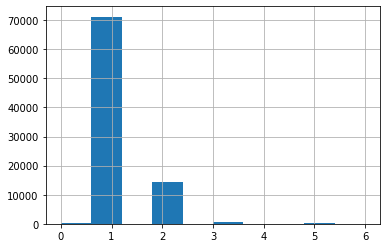

In [24]:
df_1.actividad_economica_tipo.hist()

In [25]:
df_1.tipo_segun_actividad.value_counts()

3    28064
5    18656
4    15614
2     9899
1     6552
7     5083
6     2658
8      440
9        3
0        2
Name: tipo_segun_actividad, dtype: int64

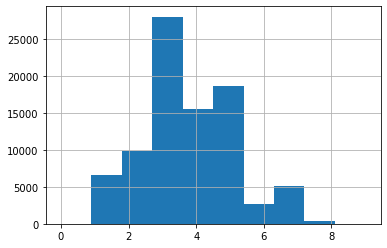

In [26]:
df_1.tipo_segun_actividad.hist()

In [27]:
df.to_csv('D:\Documentos\jmj_projects\correlation_one\Final Project\ofertas.csv')

In [ ]:
df_1.to_csv('D:\Documentos\jmj_projects\correlation_one\Final Project\ofertas_jmj.csv')

In [175]:
for cd in cat_data:
    df_1[cd] = df_1[cd].astype('category')

# Correlaciones

In [661]:
dist_feat = ['d_park', 'd_highway', 'd_bikeway', 'd_ssf', 'd_mus', 'd_lib', 'd_sitp', 'd_tm',
             'd_p_tm', 'd_gy', 'd_bom', 'd_col', 'd_ips']
dist_m_feat = ['dm_park', 'dm_highway', 'dm_bikeway', 'dm_ssf', 'dm_mus', 'dm_lib', 'dm_sitp', 'dm_tm',
             'dm_p_tm', 'dm_gy', 'dm_bom', 'dm_col', 'dm_ips']

In [663]:
distances = dist_feat + dist_m_feat

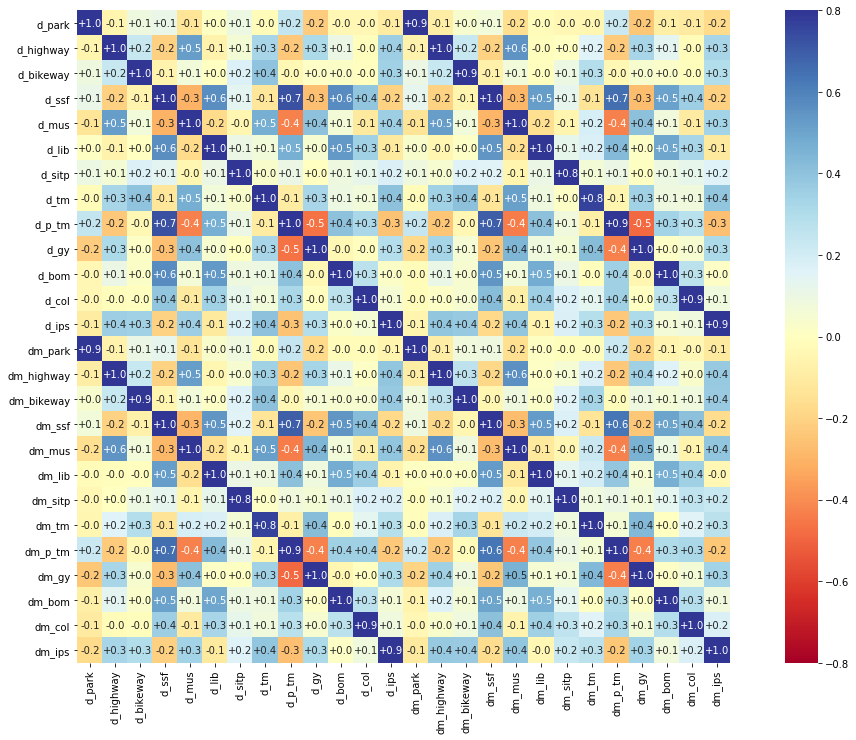

In [668]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
sns.heatmap(df_1[distances].corr(), cmap="RdYlBu", annot=True, square=True, vmin=-0.8, vmax=0.8, fmt="+.1f")
plt.show()

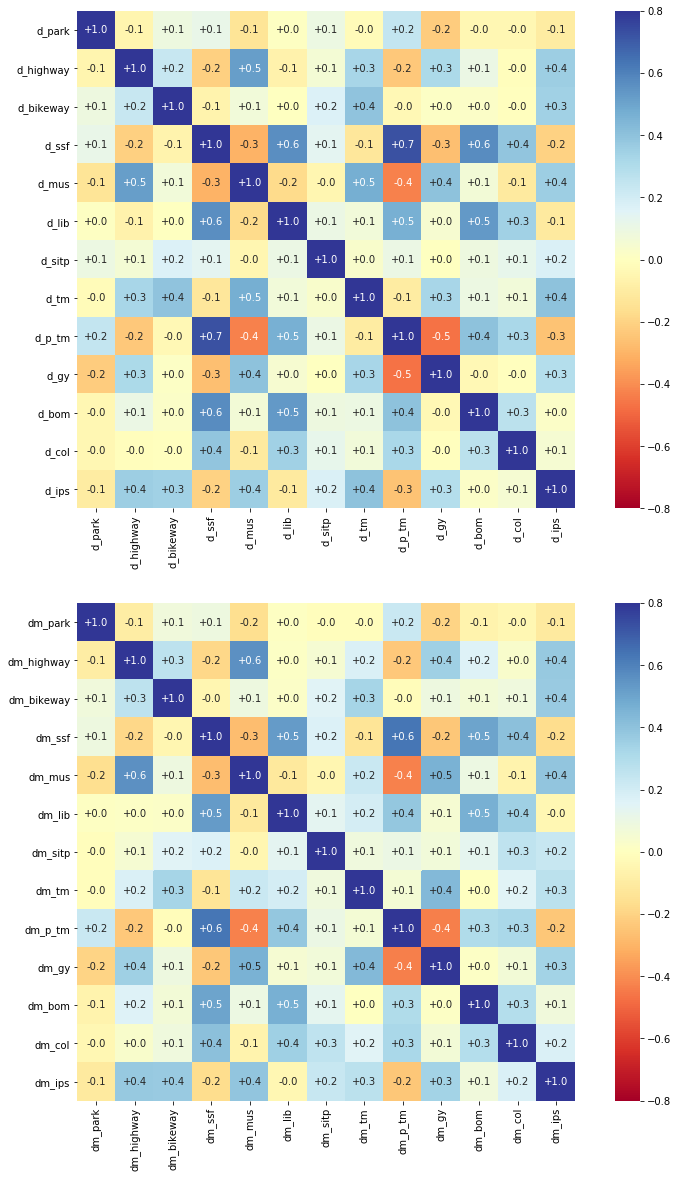

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(2, 1, figsize=(12, 17))
sns.heatmap(df_1[dist_feat].corr(), cmap="RdYlBu", annot=True, square=True, vmin=-0.8, vmax=0.8, fmt="+.1f", ax=axs[0])
sns.heatmap(df_1[dist_m_feat].corr(), cmap="RdYlBu", annot=True, square=True, vmin=-0.8, vmax=0.8, fmt="+.1f", ax=axs[1])
plt.tight_layout(pad=3.0)

In [168]:
import random
r = random.choice(dist_feat)
r_ = dist_m_feat + [r]
print(r)
df_1[r_].corr()[r].sort_values(ascending=False)

d_gy


d_gy          1.000000
dm_gy         0.986571
dm_mus        0.446308
dm_tm         0.419147
dm_highway    0.336735
dm_ips        0.315151
dm_lib        0.082516
dm_sitp       0.058788
dm_bikeway    0.053513
dm_col        0.045950
dm_bom        0.014964
dm_park      -0.176123
dm_ssf       -0.245564
dm_p_tm      -0.427637
Name: d_gy, dtype: float64

In [97]:
cols = ['estrato', 'x', 'y', 'z', 'topografia', 'd_tm', 'd_col', 'oft_tipo_inmueble', 'd_highway', 'oft_tipo_norma_juridica', 'oic_area_terreno',
        'oia_cant_garajes', 'cp_terr_ar', 'serpub_tipo', 'influencia_via', 'suelo', 'estado_via', 'd_p_tm', 'd_bom', 'd_ies', 'd_mus',
        'actividad_economica_tipo', 'clase_via', 'dm_sitp']

In [101]:
df_1[df_1.columns].corr()['vfventa2020'][:].sort_values(ascending=False)

vfventa2020              1.000000
log_vfventa2020          0.233690
estrato                  0.043540
d_p_tm                   0.038059
d_ssf                    0.037741
dm_p_tm                  0.037145
dm_ssf                   0.036980
oia_cant_garajes         0.036964
x                        0.029696
oic_area_terreno         0.027828
dm_park                  0.027618
avaluo_cat               0.027550
d_lib                    0.026164
d_park                   0.025830
manzana_id               0.025284
barmanpre                0.025284
lotcodigo                0.025284
dm_lib                   0.023144
d_col                    0.020995
oft_codigo               0.020715
avaluo_com               0.019710
dm_col                   0.019442
y                        0.016534
d_bom                    0.012842
dm_bom                   0.009925
dm_sitp                  0.009124
d_sitp                   0.008833
oic_valor_adm            0.007466
oic_area_construccion    0.003245
prevetustz    

In [96]:
df_1[df_1.columns].corr()['log_vfventa2020'][:].sort_values(ascending=False)

log_vfventa2020          1.000000
estrato                  0.574547
d_p_tm                   0.403580
dm_p_tm                  0.400081
oia_cant_garajes         0.396161
d_ssf                    0.374116
dm_ssf                   0.361373
x                        0.358711
avaluo_cat               0.336313
manzana_id               0.276120
barmanpre                0.276120
lotcodigo                0.276120
avaluo_com               0.269083
d_lib                    0.262461
vfventa2020              0.233690
dm_lib                   0.227180
y                        0.195613
d_park                   0.172562
dm_park                  0.160772
d_sitp                   0.152554
prevetustz               0.152220
d_col                    0.150634
oft_codigo               0.137291
d_bom                    0.125758
dm_sitp                  0.123443
dm_col                   0.117476
dm_bom                   0.087828
oic_valor_adm            0.021735
oic_area_terreno         0.005977
oic_area_const

# Análisis lineal

In [31]:
df_1.columns

Index(['oft_codigo', 'lotcodigo', 'nombre_barrio', 'oft_tipo_inmueble',
       'oft_tipo_norma_juridica', 'oic_area_terreno', 'oic_area_construccion',
       'oic_valor_adm', 'oic_valor_anexos', 'oia_tiene_ascensor',
       'oia_cant_garajes', 'vfventa2020', 'codigo_con', 'codigo_res', 'x', 'y',
       'd_park', 'd_highway', 'd_bikeway', 'd_ssf', 'd_mus', 'd_lib', 'd_sitp',
       'd_tm', 'd_p_tm', 'd_gy', 'd_ies', 'd_bom', 'd_col', 'd_ips',
       'dm_bikeway', 'dm_bom', 'dm_col', 'dm_gy', 'dm_highway', 'dm_ies',
       'dm_ips', 'dm_lib', 'dm_mus', 'dm_park', 'dm_p_tm', 'dm_sitp', 'dm_ssf',
       'dm_tm', 'loccodigo', 'locnombre', 'z', 'barmanpre', 'preczhf', 'suelo',
       'actividad', 'tratamiento_urb', 'topografia', 'serpub', 'serpub_tipo',
       'serpub_especif', 'via', 'clase_via', 'estado_via', 'influencia_via',
       'actividad_economica', 'actividad_economica_tipo',
       'tipo_segun_actividad', 'manzana_id', 'cp_terr_ar', 'avaluo_com',
       'avaluo_cat', 'log_vfventa2

In [32]:
ignore = ['oft_codigo', 'lotcodigo', 'manzana_id', 'prevetustz', 'oia_tiene_ascensor', 'oic_valor_adm', 'oic_valor_anexos', 
          'vfventa2020', 'preczhf', 'codigo_con', 'codigo_res', 'loccodigo', 'barmanpre', 'nombre_barrio', 'locnombre']

In [33]:
from scipy.stats import boxcox

price, fitted_lambda = boxcox(df_1['vfventa2020'])
round(fitted_lambda, 2)

-0.04

In [34]:
df_1[df_1.columns.difference(ignore)].columns

Index(['actividad', 'actividad_economica', 'actividad_economica_tipo',
       'avaluo_cat', 'avaluo_com', 'clase_via', 'cp_terr_ar', 'd_bikeway',
       'd_bom', 'd_col', 'd_gy', 'd_highway', 'd_ies', 'd_ips', 'd_lib',
       'd_mus', 'd_p_tm', 'd_park', 'd_sitp', 'd_ssf', 'd_tm', 'dm_bikeway',
       'dm_bom', 'dm_col', 'dm_gy', 'dm_highway', 'dm_ies', 'dm_ips', 'dm_lib',
       'dm_mus', 'dm_p_tm', 'dm_park', 'dm_sitp', 'dm_ssf', 'dm_tm',
       'estado_via', 'estrato', 'influencia_via', 'log_vfventa2020',
       'oft_tipo_inmueble', 'oft_tipo_norma_juridica', 'oia_cant_garajes',
       'oic_area_construccion', 'oic_area_terreno', 'serpub', 'serpub_especif',
       'serpub_tipo', 'suelo', 'tipo_segun_actividad', 'topografia',
       'tratamiento_urb', 'via', 'x', 'y', 'z'],
      dtype='object')

In [35]:
df_1.clase_via.value_counts()

5    82277
3     2655
4     1924
2       72
1       43
Name: clase_via, dtype: int64

In [36]:
df_1.suelo.dtype

CategoricalDtype(categories=[5, 6], ordered=False)

In [892]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import random

In [ ]:
# voy agregando variables y voy descartando las que no me aportan mayor R2
# le aplique la transformación logarítmica según la prueba de box-cox, dando un mejor resultado
# hasta ahora he descartado el barrio, la localidad, el area construccion, distancia sitp, distancia ips, distancia colegio,
# distancia cancha sintetica, distancia parque, distancia librería, influencia via, via, dm_col
# porque no genera mayor explicabilidad

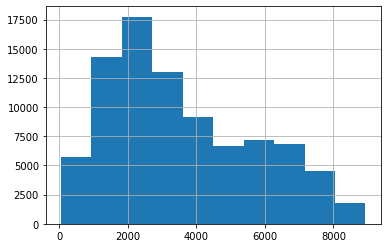

In [38]:
df_1.d_p_tm.hist()

In [103]:
cols = ['estrato', 'x', 'y', 'z', 'topografia', 'd_tm', 'd_col', 'oft_tipo_inmueble', 'd_highway', 'oft_tipo_norma_juridica', 'oic_area_terreno',
        'oia_cant_garajes', 'cp_terr_ar', 'serpub_tipo', 'influencia_via', 'suelo', 'estado_via', 'd_p_tm', 'd_bom', 'd_ies', 'd_mus',
        'actividad_economica_tipo', 'clase_via', 'dm_sitp']
cols.append('vfventa2020')
df_1[cols].corr()['vfventa2020'][:].sort_values(ascending=False)

vfventa2020         1.000000
estrato             0.043540
d_p_tm              0.038059
oia_cant_garajes    0.036964
x                   0.029696
oic_area_terreno    0.027828
d_col               0.020995
y                   0.016534
d_bom               0.012842
dm_sitp             0.009124
z                  -0.009984
d_tm               -0.015938
d_ies              -0.026584
d_mus              -0.028086
d_highway          -0.028418
Name: vfventa2020, dtype: float64

In [105]:
cols = ['estrato', 'x', 'y', 'z', 'topografia', 'd_tm', 'd_col', 'oft_tipo_inmueble', 'd_highway', 'oft_tipo_norma_juridica', 'oic_area_terreno',
        'oia_cant_garajes', 'cp_terr_ar', 'serpub_tipo', 'influencia_via', 'suelo', 'estado_via', 'd_p_tm', 'd_bom', 'd_ies', 'd_mus',
        'actividad_economica_tipo', 'clase_via', 'dm_sitp']
cols.append('log_vfventa2020')
df_1[cols].corr()['log_vfventa2020'][:].sort_values(ascending=False)

log_vfventa2020     1.000000
estrato             0.574547
d_p_tm              0.403580
oia_cant_garajes    0.396161
x                   0.358711
y                   0.195613
d_col               0.150634
d_bom               0.125758
dm_sitp             0.123443
oic_area_terreno    0.005977
z                  -0.180369
d_tm               -0.266424
d_highway          -0.313086
d_ies              -0.341246
d_mus              -0.410449
Name: log_vfventa2020, dtype: float64

In [267]:
cols = ['estrato', 'x', 'y', 'z', 'topografia', 'd_tm', 'd_col', 'oft_tipo_inmueble', 'd_highway', 'oft_tipo_norma_juridica', 'oic_area_terreno',
        'oia_cant_garajes', 'cp_terr_ar', 'serpub_tipo', 'influencia_via', 'suelo', 'estado_via', 'd_p_tm', 'd_bom', 'd_ies', 'd_mus',
        'actividad_economica_tipo', 'clase_via', 'dm_sitp']

temp = df_1.copy()
temp['log_oic_area_terreno'] = np.log(temp['oic_area_terreno'])
temp['log_d_p_tm'] = np.log(temp['d_p_tm'])

agg = ['log_vfventa2020', 'log_oic_area_terreno', 'log_d_p_tm']
for n in agg:
    cols.append(n)
temp[cols].corr()['log_vfventa2020'][:].sort_values(ascending=False)

log_vfventa2020         1.000000
estrato                 0.574547
log_oic_area_terreno    0.437029
d_p_tm                  0.403580
oia_cant_garajes        0.396161
log_d_p_tm              0.367343
x                       0.358711
y                       0.195613
d_col                   0.150634
d_bom                   0.125758
dm_sitp                 0.123443
oic_area_terreno        0.005977
z                      -0.180369
d_tm                   -0.266424
d_highway              -0.313086
d_ies                  -0.341246
d_mus                  -0.410449
Name: log_vfventa2020, dtype: float64

In [949]:
df_1['log_oic_area_terreno'] = np.log(df_1['oic_area_terreno'])
df_1['sqrt_oic_area_terreno'] = np.sqrt(df_1['oic_area_terreno'])
df_1['log_oic_area_construccion'] = np.log(df_1['oic_area_construccion'])
df_1['sqrt_oic_area_construccion'] = np.sqrt(df_1['oic_area_construccion'])
df_1['log_oic_area_terreno'] = df_1['log_oic_area_terreno'].replace([np.inf, -np.inf], np.nan).dropna()
df_1['log_oic_area_construccion'] = df_1['log_oic_area_terreno'].replace([np.inf, -np.inf], np.nan).dropna()

only = ['estrato', 'x', 'y', 'topografia', 'd_tm', 'd_col', 'oft_tipo_inmueble', 'd_highway', 'oft_tipo_norma_juridica', 'sqrt_oic_area_terreno',
        'oia_cant_garajes', 'cp_terr_ar', 'influencia_via', 'suelo', 'd_p_tm', 'd_bom', 'd_mus', 'sqrt_oic_area_construccion']

# , 'dm_sitp'
#actividad_economica_tipo

df_1_ = df_1.copy()
df_1_ = df_1_[(df_1_.log_vfventa2020 < 22) & (df_1.log_vfventa2020 > 16) & 
              (df_1.sqrt_oic_area_construccion < 50) & 
              (df_1.sqrt_oic_area_terreno < 50)]
# elimine 'd_ies' porque con sqrt del area de terreno no cambia nada el performance y mostraba que era no significativa
# sacarle logaritmo naturl a oic_area_terreno
# eliminar avaluo comercial y catastral
# distancia manhattan bombero no es tan buena como distancia bomberos (en AIC)

col = " + ".join(only)

my_formula = 'log_vfventa2020 ~ ' + col
print(my_formula)
model_all = smf.ols(formula=my_formula, data=df_1_).fit()
print('The AIC is:', round(model_all.aic, 2))
model_all.summary()

D:\Programas\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


log_vfventa2020 ~ estrato + x + y + topografia + d_tm + d_col + oft_tipo_inmueble + d_highway + oft_tipo_norma_juridica + sqrt_oic_area_terreno + oia_cant_garajes + cp_terr_ar + influencia_via + suelo + d_p_tm + d_bom + d_mus + sqrt_oic_area_construccion
The AIC is: 60515.28


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_vfventa2020   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     8351.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:47:58   Log-Likelihood:                -30223.
No. Observations:               78607   AIC:                         6.052e+04
Df Residuals:                   78572   BIC:                         6.084e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  17.5414      0.463     37.894      0.000      16.634      18.449
topografia[T.2]                            -0.0444      0.006     -8.039      0.000      -0.055      -0.034
topografia[T.3]                            -0.0823      0.008    -10.198      0.000      -0.098      -0.066
oft_tipo_inmueble[T.Apartamento]            0.1915      0.020      9.670      0.000       0.153       0.230
oft_tipo_inmueble[T.Bodega]                 0.7789      0.025     30.617      0.000       0.729       0.829
oft_tipo_inmueble[T.Casa]                   0.2825      0.020     13.865      0.000       0.243       0.322
oft_tipo_inmueble[T.Casa uso mixto]         0.4702      0.021     21.899      0.000       0.428       0.512
oft_tipo_inmueble[T.Deposito]              -0.3709      0.044     -8.512      0.000      -0.456      -0.286
oft_tipo_inmueble[T.Edificio]               0.6896      0.028     24.530      0.000       0.634       0.745
oft_tipo_inmueble[T.Garaje]                -1.5156      0.045    -33.969      0.000      -1.603      -1.428
oft_tipo_inmueble[T.Inmueble comercial]     0.7511      0.039     19.192      0.000       0.674       0.828
oft_tipo_inmueble[T.Local]                  0.0989      0.025      3.979      0.000       0.050       0.148
oft_tipo_inmueble[T.Lote]                   0.7034      0.024     29.179      0.000       0.656       0.751
oft_tipo_inmueble[T.Oficina]                0.1449      0.022      6.476      0.000       0.101       0.189
oft_tipo_inmueble[T.Otros]                  0.3750      0.054      6.937      0.000       0.269       0.481
oft_tipo_inmueble[T.Parqueadero]           -1.6851      0.029    -58.180      0.000      -1.742      -1.628
oft_tipo_norma_juridica[T.PH]              -0.1019      0.005    -21.796      0.000      -0.111      -0.093
cp_terr_ar[T.P]                            -0.0192      0.003     -5.922      0.000      -0.026      -0.013
influencia_via[T.1]                         0.9177      0.082     11.159      0.000       0.757       1.079
influencia_via[T.2]                         0.9508      0.082     11.538      0.000       0.789       1.112
influencia_via[T.3]                         0.9385      0.082     11.387      0.000       0.777       1.100
influencia_via[T.4]                         0.9655      0.082     11.705      0.000       0.804       1.127
suelo[T.6]                                  0.2477      0.020     12.637      0.000       0.209       0.286
estrato                                     0.2450      0.002    118.602      0.000       0.241       0.249
x                                       -1.422e-05   5.34e-07    -26.605      0.000   -1.53e-05   -1.32e-05
y                                        1.303e-05   3.06e-

Check for heteroscedasticity

Text(0.5, 1.0, 'Residuals without outliers')

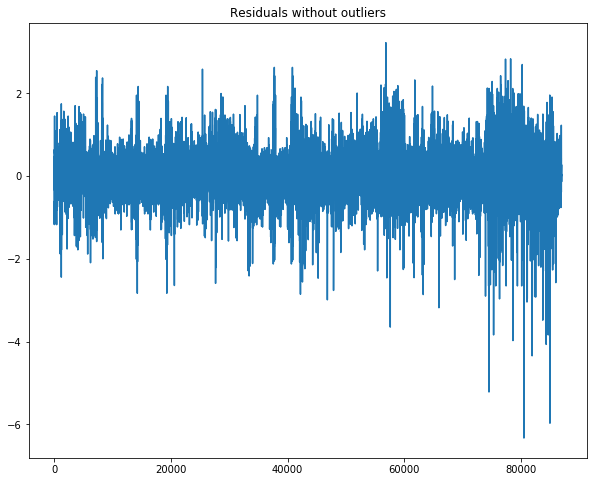

In [950]:
plt.figure(figsize=(10, 8))
model_all.resid.plot()
plt.title('Residuals without outliers')

In [948]:
sms.het_goldfeldquandt(model_all.resid, model_all.model.exog)

(1.2573977718826799, 4.513984959557932e-114, 'increasing')

In [951]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model_all.resid, model_all.model.exog)
dict(zip(name, test))

{'Lagrange multiplier statistic': 10763.558774434918,
 'p-value': 0.0,
 'f-value': 366.63752203403607,
 'f p-value': 0.0}

Probar otros modelos

In [849]:
only = ['estrato', 'x', 'y', 'topografia', 'd_tm', 'd_col', 'oft_tipo_inmueble', 'd_highway', 'oft_tipo_norma_juridica', 'oic_area_terreno',
        'oia_cant_garajes', 'cp_terr_ar', 'suelo', 'd_p_tm', 'd_bom', 'd_mus', 'sqrt_oic_area_terreno', 'sqrt_oic_area_construccion',
        'log_oic_area_terreno', 'log_oic_area_construccion', 'actividad_economica_tipo', 'clase_via', 'oic_area_construccion', 'vfventa2020', 'log_vfventa2020']

df_2 = df_1.loc[(df_1_.log_vfventa2020 < 22) & (df_1.log_vfventa2020 > 16) & (df_1.sqrt_oic_area_construccion < 50) &
                (df_1.sqrt_oic_area_terreno < 50), only].copy().dropna()
df_2

,estrato,x,y,topografia,d_tm,d_col,oft_tipo_inmueble,d_highway,oft_tipo_norma_juridica,oic_area_terreno,oia_cant_garajes,cp_terr_ar,suelo,d_p_tm,d_bom,d_mus,sqrt_oic_area_terreno,sqrt_oic_area_construccion,log_oic_area_terreno,log_oic_area_construccion,actividad_economica_tipo,clase_via,oic_area_construccion,vfventa2020,log_vfventa2020
0,5.0,1.001029e+06,1.016411e+06,2,1631.847033,267.330342,Apartamento,31.022020,PH,1.0,2,P,6,2591.530972,1306.720762,2797.923570,1.000000,12.421755,0.000000,0.000000,1,5,154.30,8.385538e+08,20.547189
1,5.0,1.001029e+06,1.016411e+06,2,1631.847033,267.330342,Apartamento,31.022020,PH,1.0,2,P,6,2591.530972,1306.720762,2797.923570,1.000000,12.421755,0.000000,0.000000,1,5,154.30,8.980613e+08,20.615749
2,5.0,1.002157e+06,1.007369e+06,1,335.001609,491.935033,Oficina,80.395866,PH,1.0,2,N,6,7184.778515,1691.440905,425.246626,1.000000,8.810789,0.000000,0.000000,2,5,77.63,5.576739e+08,20.139285
3,5.0,1.001184e+06,1.011152e+06,1,449.852551,324.595001,Apartamento,197.631985,PH,1.0,2,P,6,5006.047133,2954.407099,2548.295866,1.000000,9.721111,0.000000,0.000000,1,5,94.50,4.279725e+08,19.874570
4,6.0,1.002798e+06,1.010680e+06,1,413.261916,279.132676,Apartamento,124.598558,PH,1.0,2,P,6,6693.263262,4075.981245,1879.858494,1.000000,11.340194,0.000000,0.000000,1,5,128.60,1.051021e+09,20.773028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86966,3.0,9.992487e+05,9.981240e+05,1,697.007311,56.462664,Casa,196.691247,NPH,202.0,1,N,6,2082.359357,2133.685567,510.868103,14.212670,20.203960,5.308268,5.308268,1,5,408.20,8.354650e+08,20.543499
86967,3.0,9.992839e+05,9.980533e+05,1,761.112292,13.154281,Casa,165.635066,NPH,200.0,3,N,6,2056.286387,2156.473259,443.938434,14.142136,11.891173,5.298317,5.298317,1,5,141.40,4.190350e+08,19.853465
86968,2.0,9.890125e+05,1.004860e+06,1,1524.551148,119.288128,Casa,480.153439,NPH,72.0,0,N,6,1282.975411,2846.375223,7552.977090,8.485281,12.002500,4.276666,4.276666,1,4,144.06,2.329680e+08,19.266412
86969,2.0,9.890178e+05,1.004863e+06,1,1521.493863,113.291148,Casa,480.632058,NPH,72.0,1,N,6,1284.104835,2845.263212,7547.942590,8.485281,8.402381,4.276666,4.276666,1,4,70.60,2.134660e+08,19.178988


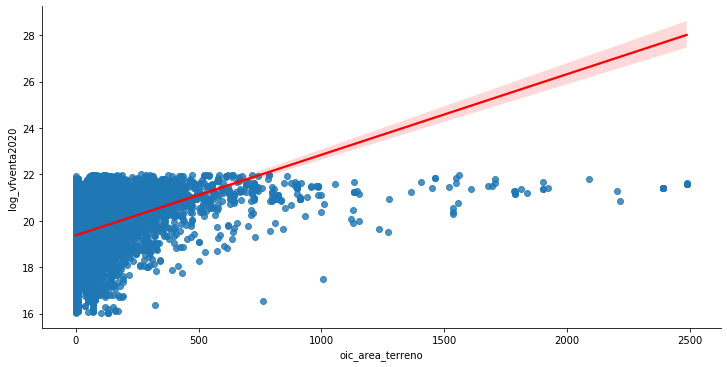

In [850]:
import seaborn as sns

sns.lmplot(x='oic_area_terreno',y='log_vfventa2020',data=df_2, 
           line_kws = {'color': "red"} ,aspect= 2)
#plt.title("Price vs. Sqft_living");

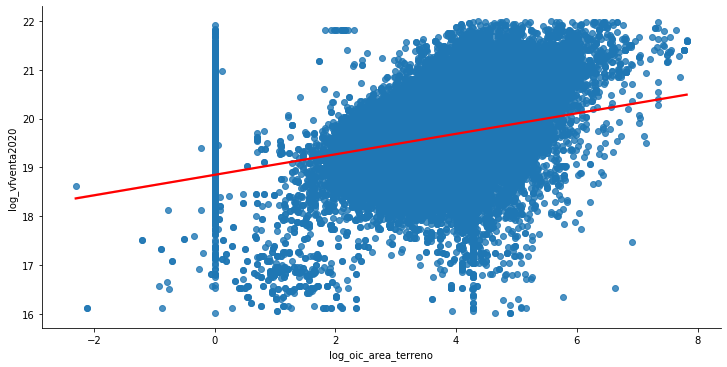

In [851]:
import seaborn as sns

sns.lmplot(x='log_oic_area_terreno',y='log_vfventa2020',data=df_2, 
           line_kws = {'color': "red"} ,aspect= 2)
#plt.title("Price vs. Sqft_living");

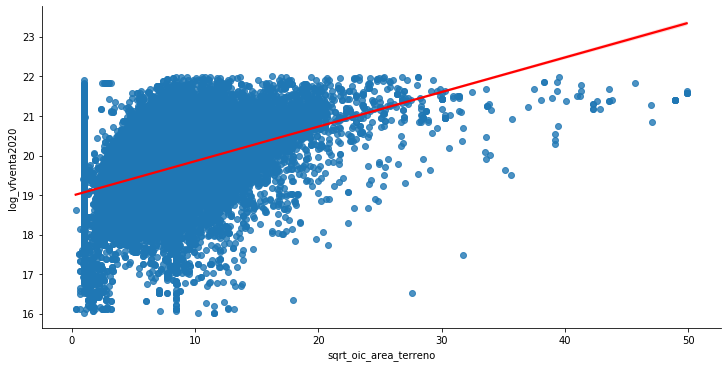

In [852]:
import seaborn as sns

sns.lmplot(x='sqrt_oic_area_terreno',y='log_vfventa2020',data=df_2, 
           line_kws = {'color': "red"} ,aspect= 2)
#plt.title("Price vs. Sqft_living");

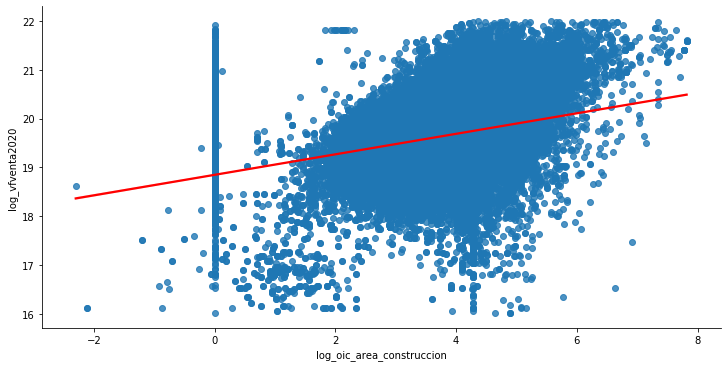

In [853]:
import seaborn as sns

sns.lmplot(x='log_oic_area_construccion',y='log_vfventa2020',data=df_2, 
           line_kws = {'color': "red"} ,aspect= 2)
#plt.title("Price vs. Sqft_living");

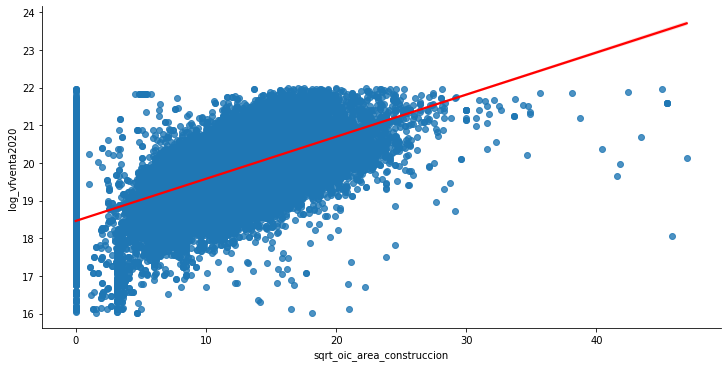

In [915]:
import seaborn as sns



sns.lmplot(x='sqrt_oic_area_construccion',y='log_vfventa2020',data=df_2, 
           line_kws = {'color': "red"} ,aspect= 2)
#plt.title("Price vs. Sqft_living");

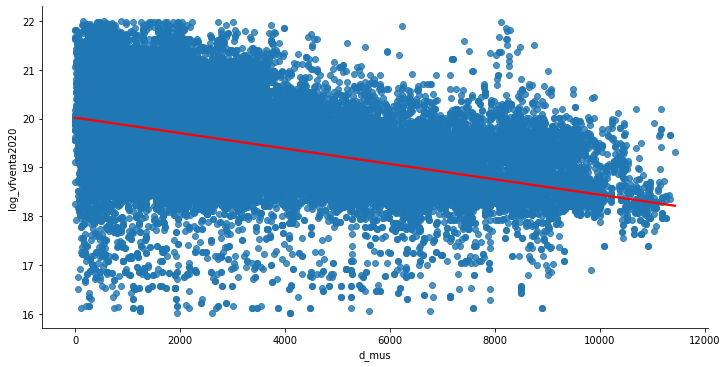

In [855]:
import seaborn as sns

sns.lmplot(x='d_mus',y='log_vfventa2020',data=df_2, 
           line_kws = {'color': "red"} ,aspect= 2)
#plt.title("Price vs. Sqft_living");

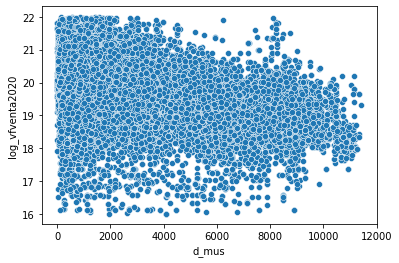

In [856]:
sns.scatterplot(x='d_mus', y='log_vfventa2020', data=df_2)

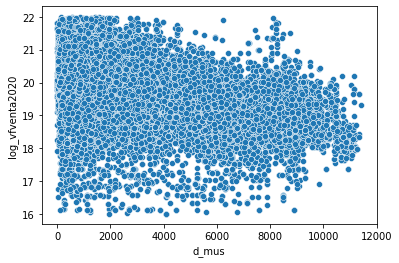

In [857]:
sns.scatterplot(x='d_mus', y='log_vfventa2020', data=df_2)

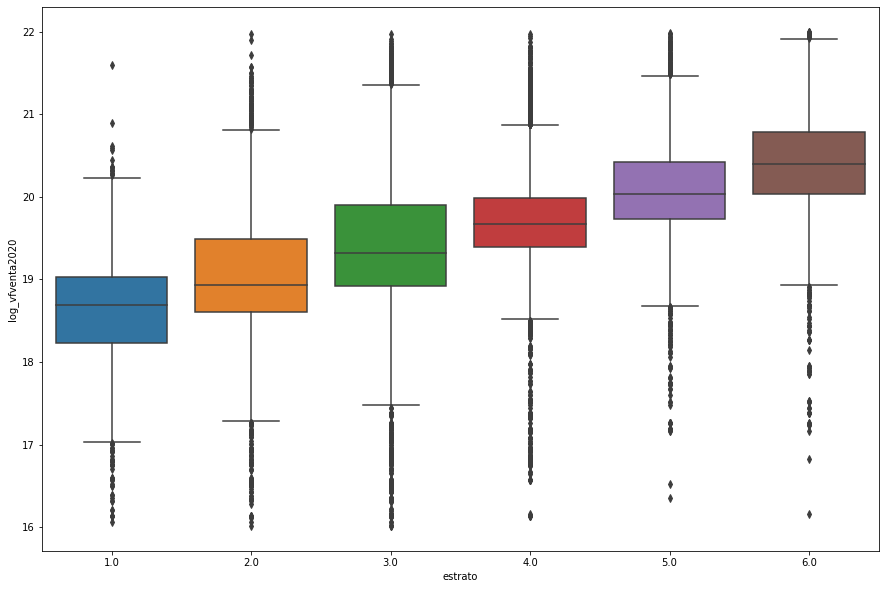

In [858]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='estrato', y='log_vfventa2020', data=df_2)
plt.show()

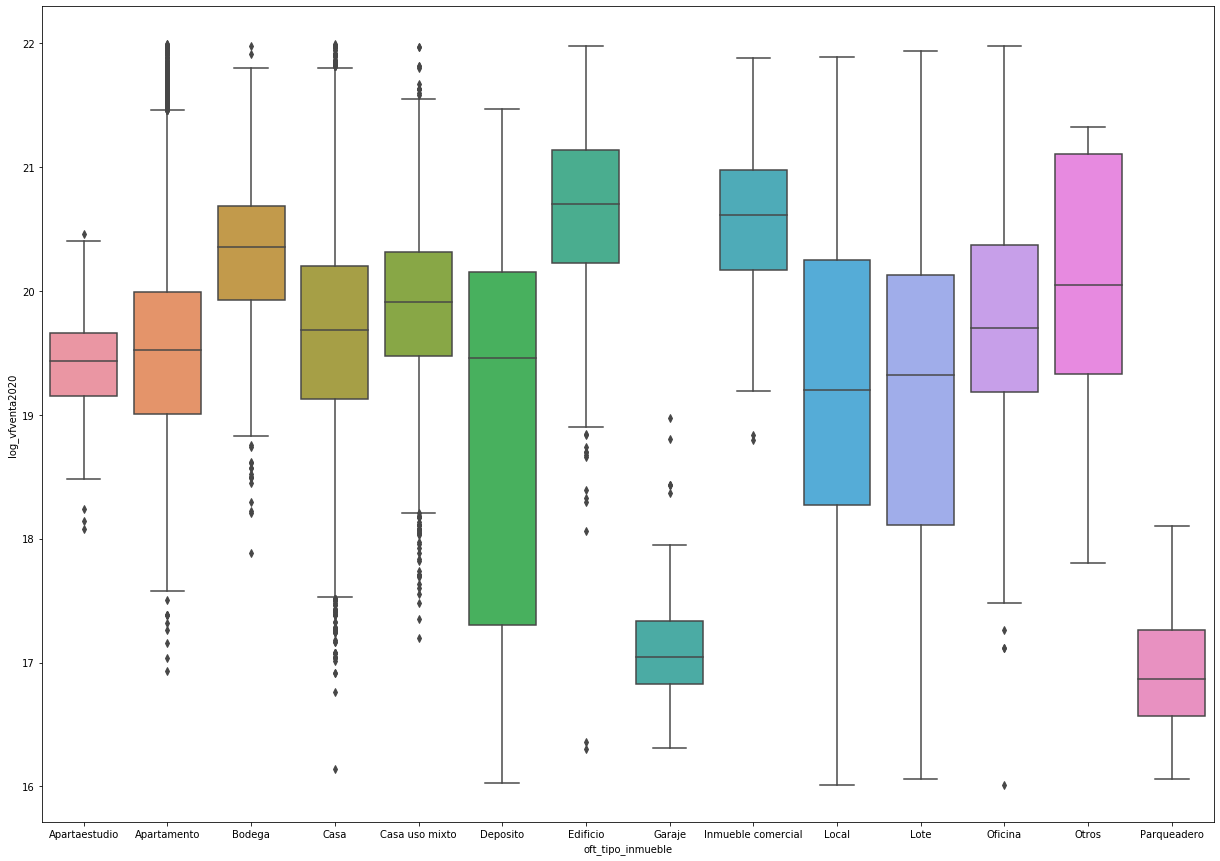

In [859]:
plt.figure(figsize=(21, 15))
sns.boxplot(x='oft_tipo_inmueble', y='log_vfventa2020', data=df_2)
plt.show()

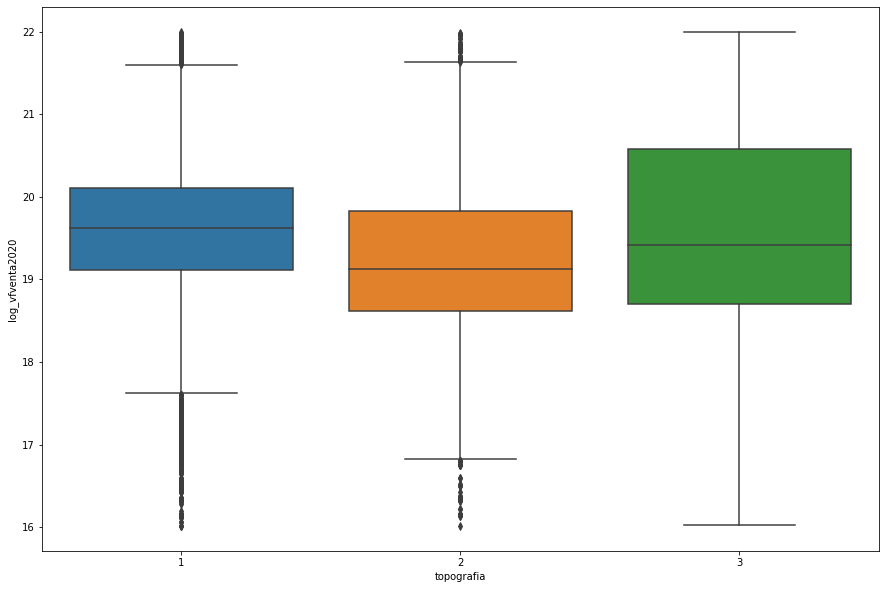

In [860]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='topografia', y='log_vfventa2020', data=df_2)
plt.show()

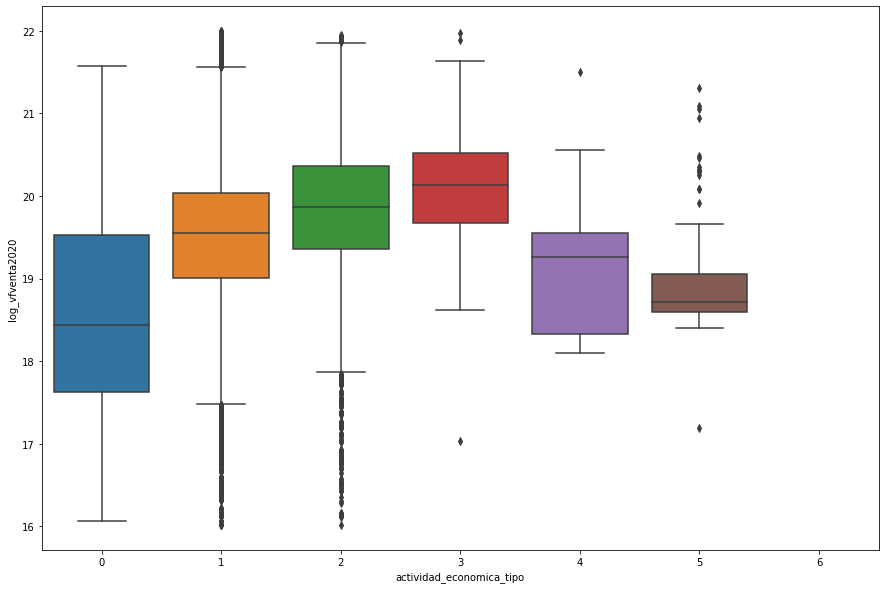

In [861]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='actividad_economica_tipo', y='log_vfventa2020', data=df_2)
plt.show()

In [862]:
df_2.describe()

,estrato,x,y,d_tm,d_col,d_highway,oic_area_terreno,oia_cant_garajes,d_p_tm,d_bom,d_mus,sqrt_oic_area_terreno,sqrt_oic_area_construccion,log_oic_area_terreno,log_oic_area_construccion,oic_area_construccion,vfventa2020,log_vfventa2020
count,78545.000000,7.854500e+04,7.854500e+04,78545.000000,78545.000000,78545.000000,78545.000000,78545.000000,78545.000000,78545.000000,78545.000000,78545.000000,78545.000000,78545.000000,78545.000000,78545.000000,7.854500e+04,78545.000000
mean,3.575237,9.983385e+05,1.008088e+06,1353.213541,229.627739,275.635372,63.527772,0.844560,3587.618410,1997.199033,2718.658772,6.960031,10.096896,3.529984,3.529984,118.077294,4.304101e+08,19.590956
std,1.298904,4.974710e+03,6.668908e+03,1151.282205,187.505796,335.104580,86.271154,1.026409,2094.104171,996.549645,2205.979618,3.884061,4.016240,1.308432,1.308432,98.767629,3.782986e+08,0.763178
min,1.000000,9.847961e+05,9.860095e+05,17.091672,0.000000,0.000000,0.100000,0.000000,65.239088,8.520666,0.000000,0.316228,0.000000,-2.302585,-2.302585,0.000000,9.000000e+06,16.012735
25%,3.000000,9.946207e+05,1.003576e+06,545.299926,101.543196,58.596378,21.320000,0.000000,1941.034805,1226.772543,1097.022321,4.617359,7.483315,3.059646,3.059646,56.000000,1.875326e+08,19.049463
50%,3.000000,9.989673e+05,1.009346e+06,1091.751666,178.423338,164.462259,36.190000,1.000000,3086.084481,1923.195598,2068.013880,6.015812,9.055385,3.588783,3.588783,82.000000,3.237898e+08,19.595605
75%,4.000000,1.002640e+06,1.013527e+06,1807.001988,296.771709,363.661967,74.400000,1.000000,5200.231676,2681.147857,3585.117406,8.625543,12.284136,4.309456,4.309456,150.900000,5.370453e+08,20.101593
max,6.000000,1.007084e+06,1.024531e+06,9629.658636,1799.980188,3072.569209,2486.700000,30.000000,8917.327696,7451.031467,11430.039089,49.866823,46.925473,7.818712,7.818712,2202.000000,3.580346e+09,21.998725


In [694]:
df_2.log_vfventa2020.sort_values(ascending=False)

51171    27.080820
51410    27.027709
52485    26.971620
47730    26.709255
73087    26.563951
           ...    
19315    13.862078
14255    13.862078
19124    13.804449
14063    13.804449
74253    12.278393
Name: log_vfventa2020, Length: 78989, dtype: float64

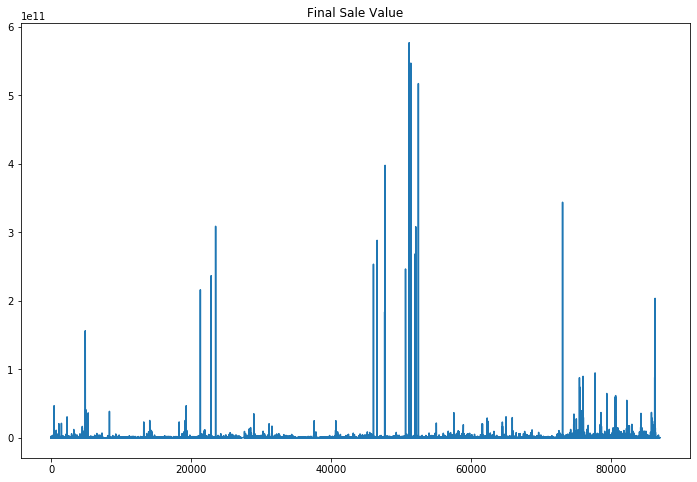

In [790]:
plt.figure(figsize=(12, 8))
df_1.vfventa2020.plot()
plt.title('Final Sale Value')
plt.show()

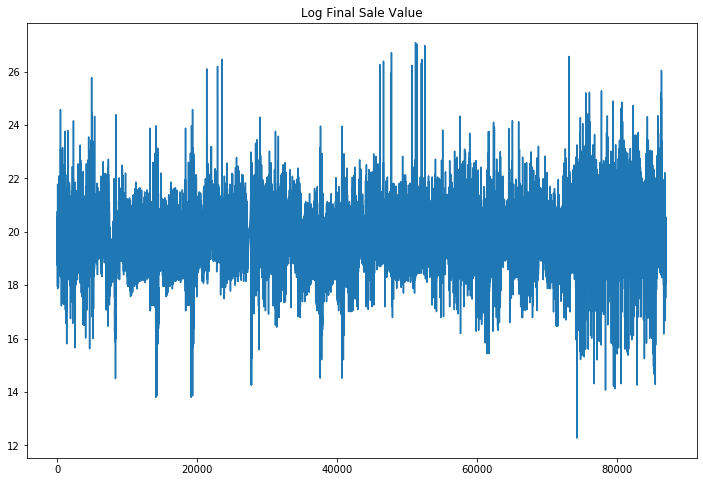

In [793]:
plt.figure(figsize=(12, 8))
df_1.log_vfventa2020.plot()
plt.title('Log Final Sale Value')
plt.show()

In [127]:
df_1.isna().sum().sort_values(ascending=False).head(10)

prevetustz               67492
oia_tiene_ascensor       64632
oic_valor_adm            50537
oic_valor_anexos         50537
estrato                   4370
oic_area_terreno          3256
oic_area_construccion      664
dm_col                       0
d_ies                        0
d_sitp                       0
dtype: int64

In [863]:
#temp = df_1.copy().drop(['prevetustz', 'log_vfventa2020', 'oic_valor_anexos'], axis=1)
#temp['oia_tiene_ascensor'] = temp['oia_tiene_ascensor'].fillna('SIN REGISTRO')
#temp['oic_valor_adm'] = temp['oic_valor_adm'].fillna(temp['oic_valor_adm'].mean())
#temp.dropna(inplace=True)

temp = df_1[(df_1_.log_vfventa2020 < 22) & (df_1.log_vfventa2020 > 16)  & (df_1.sqrt_oic_area_construccion < 50) &
                (df_1.sqrt_oic_area_terreno < 50)].copy()
#temp = df_1.copy().drop('log_vfventa2020', axis=1)
temp.dropna(inplace=True)
temp

,oft_codigo,lotcodigo,nombre_barrio,oft_tipo_inmueble,oft_tipo_norma_juridica,oic_area_terreno,oic_area_construccion,oic_valor_adm,oic_valor_anexos,oia_tiene_ascensor,oia_cant_garajes,vfventa2020,codigo_con,codigo_res,x,y,d_park,d_highway,d_bikeway,d_ssf,d_mus,d_lib,d_sitp,d_tm,d_p_tm,d_gy,d_ies,d_bom,d_col,d_ips,dm_bikeway,dm_bom,dm_col,dm_gy,dm_highway,dm_ies,dm_ips,dm_lib,dm_mus,dm_park,dm_p_tm,dm_sitp,dm_ssf,dm_tm,loccodigo,locnombre,z,barmanpre,preczhf,suelo,actividad,tratamiento_urb,topografia,serpub,serpub_tipo,serpub_especif,via,clase_via,estado_via,influencia_via,actividad_economica,actividad_economica_tipo,tipo_segun_actividad,manzana_id,cp_terr_ar,avaluo_com,avaluo_cat,log_vfventa2020,estrato,prevetustz,log_oic_area_terreno,sqrt_oic_area_terreno,log_oic_area_construccion,sqrt_oic_area_construccion
7,338327,2107015017,LA FRAGUA,Casa,NPH,215.3,212.2,0.0,0.0,NO,1,440020725.4,0.0,0.0,996605.508928,9.999141e+05,60.448203,184.217553,118.104534,60.469877,1081.568014,1268.189145,98.152074,307.120315,3512.888436,1123.118603,256.780725,641.644996,52.524024,305.092315,454.455535,872.960160,57.083612,1294.696714,274.400266,575.522681,652.353265,1625.051044,1701.149073,75.299833,4576.070933,128.708232,68.680576,778.473217,15.0,ANTONIO NARIÑO,2560.960927,2107015017,6222115153113,6,22,21,1,51,5,1,531,5,3,1,13,1,3,2107015,N,2059362.0,1438888.0,19.902332,3.0,1971.0,5.372032,14.673105,5.372032,14.567086
8,338328,2107003021,LA FRAGUA,Casa,NPH,218.1,262.9,0.0,0.0,NO,1,523834196.9,0.0,0.0,996934.686143,9.997534e+05,123.553599,60.735852,123.852639,123.580949,1425.288681,1066.572074,62.156821,652.046446,3259.878232,1375.657659,584.227451,586.945413,67.320083,358.806556,203.364101,683.506877,74.599008,1728.397621,124.594416,1010.947504,617.884815,1435.597760,1866.189669,192.796403,4440.443420,123.677101,189.440405,1094.176156,15.0,ANTONIO NARIÑO,2561.000000,2107003021,6222115153113,6,22,21,1,51,5,1,531,5,3,1,13,1,3,2107003,N,2000000.0,1360000.0,20.076686,3.0,1960.0,5.384954,14.768209,5.384954,16.214191
9,338329,2107011002,LA FRAGUA,Casa,NPH,180.0,295.4,0.0,0.0,NO,3,534310880.8,0.0,0.0,996786.823252,9.995758e+05,191.403316,31.176822,349.523925,191.436756,1460.730072,936.073114,68.551804,690.608510,3134.680670,1196.309215,641.016083,359.680743,297.812712,399.331612,446.487545,441.420882,298.351331,1519.486441,114.054060,905.596545,485.480171,1193.511765,2031.222938,253.447091,4198.357425,94.497537,233.627105,1108.547082,15.0,ANTONIO NARIÑO,2562.508779,2107011002,6222115153113,6,22,21,1,51,5,1,531,5,3,1,13,1,3,2107011,N,2447807.0,2010694.0,20.096488,3.0,1960.0,5.192957,13.416408,5.192957,17.187205
10,338330,2107001010,LA FRAGUA,Casa,NPH,157.5,233.8,0.0,0.0,NO,2,440020725.4,0.0,0.0,996877.737278,9.998509e+05,9.145264,167.894341,60.094157,9.172572,1315.137864,1173.131295,172.893801,545.802863,3368.745524,1350.894360,475.027301,643.980645,118.064471,264.646518,73.635469,819.604352,187.526578,1598.236645,227.537266,881.218871,610.575531,1571.695236,1819.345919,13.516607,4576.540896,259.774577,6.351989,964.447524,15.0,ANTONIO NARIÑO,2563.961913,2107001010,6222115153113,6,22,21,1,51,5,1,531,5,3,1,13,1,3,2107001,N,2000000.0,1369790.0,19.902332,3.0,1960.0,5.059425,12.549900,5.059425,15.290520
11,338331,2107024036,LA FRAGUA,Casa,NPH,247.0,179.1,0.0,0.0,NO,2,555264248.7,0.0,0.0,996487.116483,9.997992e+05,46.200195,208.920689,271.268474,183.184405,1107.320114,1268.741327,88.842252,370.595818,3449.718504,965.303426,352.493468,538.529941,87.958550,321.203672,453.315159,746.743928,145.453586,1186.319370,273.259890,574.382305,471.631545,1535.541647,1700.008698,54.934983,4383.583202,155.752027,224.736660,777.332842,15.0,ANTONIO NARIÑO,2562.557679,2107024036,6222115153113,6,22,21,1,51,5,1,531,5,3,1,13,1,3,2107024,N,1883138.0,1299436.0,20.134955,3.0,1971.0,5.509388,15.716234,5.509388,13.382825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [864]:
temp.isna().sum().sort_values(ascending=False).head(10)

sqrt_oic_area_construccion    0
d_bikeway                     0
d_mus                         0
d_lib                         0
d_sitp                        0
d_tm                          0
d_p_tm                        0
d_gy                          0
d_ies                         0
d_bom                         0
dtype: int64

In [865]:
temp.corr()['vfventa2020'][:].sort_values(ascending=False)[1:]

log_vfventa2020               0.870409
estrato                       0.665641
avaluo_cat                    0.606443
sqrt_oic_area_terreno         0.584058
oic_area_terreno              0.580459
avaluo_com                    0.533468
oic_area_construccion         0.529923
sqrt_oic_area_construccion    0.440430
x                             0.397504
d_p_tm                        0.394855
log_oic_area_construccion     0.393808
log_oic_area_terreno          0.393808
manzana_id                    0.391220
lotcodigo                     0.391220
barmanpre                     0.391220
dm_p_tm                       0.388921
y                             0.346343
d_ssf                         0.340005
oia_cant_garajes              0.334270
dm_ssf                        0.311577
dm_park                       0.125397
d_park                        0.122236
prevetustz                    0.076710
dm_sitp                       0.076281
d_sitp                        0.070597
d_lib                    

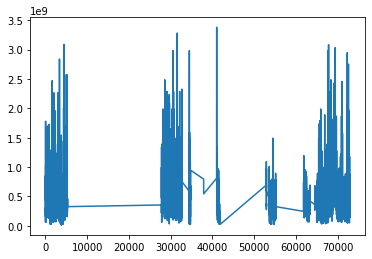

In [866]:
temp.vfventa2020.plot()

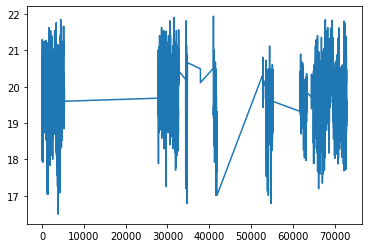

In [867]:
temp.log_vfventa2020.plot()

# Modelo Machine Learning

In [935]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [885]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [621]:
ignore = ['oft_codigo', 'lotcodigo', 'manzana_id', 'prevetustz', 'oia_tiene_ascensor', 'oic_valor_adm', 'oic_valor_anexos', 
          'log_vfventa2020', 'preczhf', 'codigo_con', 'codigo_res', 'loccodigo', 'barmanpre', 'nombre_barrio', 'locnombre',
          'avaluo_com', 'avaluo_cat', 'oic_area_terreno', 'oic_area_construccion']

#only = ['estrato', 'x', 'y', 'topografia', 'd_tm', 'd_col', 'oft_tipo_inmueble', 'd_highway', 'oft_tipo_norma_juridica', 'sqrt_oic_area_terreno',
#        'oia_cant_garajes', 'cp_terr_ar', 'suelo', 'd_p_tm', 'd_bom', 'd_mus',
#        'actividad_economica_tipo', 'clase_via', 'dm_sitp', 'sqrt_oic_area_construccion', 'vfventa2020']

only = ['estrato', 'topografia', 'suelo', 'vfventa2020']


df_1_ = df_1.copy()
df_1_ = df_1_[only]

df_1_.dropna(inplace=True)
X = df_1_.drop('vfventa2020', axis=1)

X.astype({'estrato':float})
X = pd.get_dummies(X)
y = df_1_[['vfventa2020']]
X

,estrato,topografia_1,topografia_2,topografia_3,suelo_5,suelo_6
0,5.0,0,1,0,0,1
1,5.0,0,1,0,0,1
2,5.0,1,0,0,0,1
3,5.0,1,0,0,0,1
4,6.0,1,0,0,0,1
...,...,...,...,...,...,...
86966,3.0,1,0,0,0,1
86967,3.0,1,0,0,0,1
86968,2.0,1,0,0,0,1
86969,2.0,1,0,0,0,1


In [592]:
X.isna().sum().sort_values(ascending=False).head(3)

actividad_economica_tipo_6    0
actividad_economica_tipo_5    0
actividad_economica_tipo_4    0
dtype: int64

In [622]:
num_cols = list(X.columns.difference(cat_data))
cat_cols = list(X.columns.difference(num_cols))
print(num_cols)
print(cat_cols)

In [287]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [506]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), # fill_value='missing' for string or 0 if numerical category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])

In [508]:
rgr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(n_estimators=10))])

In [624]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [625]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
y_train = ss.fit_transform(y_train)

In [626]:
rgr = RandomForestRegressor(n_estimators=10)

In [627]:
rgr.fit(X_train, y_train)

D:\Programas\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [498]:
X_test.estrato.value_counts()

3.0    5308
4.0    3844
2.0    3097
5.0    1933
6.0    1868
1.0     471
Name: estrato, dtype: int64

In [ ]:
for n in range(1, 7):
    temp = X_test[X_test.estrato == n]
    temp_train = X_train[X_train.estrato == n]
    y_pred_ = rgr.predict(temp)
    y_test_ = y_test[y_test.index.isin(list(temp.index.values))]
    y_train_ = y_train[y_train.index.isin(list(temp_train.index.values))]
    
    print('Estrato', n)
    print('Score entrenamiento: %.3f' % r2_score(y_train_, rgr.predict(temp_train)))
    print('RMSE Validación: %.1f' % (np.sqrt(mean_squared_error(y_pred_, y_test_))))
    print('Score validación: %.3f' % r2_score(y_pred_, y_test_))
    print('-------------------------------------------')

In [628]:
y_pred = ss.inverse_transform(rgr.predict(X_test))

round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

5135061080.25

In [629]:
print('Accuracy de validación')
round(r2_score(y_test, y_pred), 3)

Accuracy de validación


0.002

In [630]:
print('Accuracy de entrenamiento')
round(r2_score(y_train, rgr.predict(X_train)), 3)

Accuracy de entrenamiento


0.002

In [631]:
results = pd.DataFrame({'true':y_test.values.reshape(1, -1)[0], 'pred':y_pred})

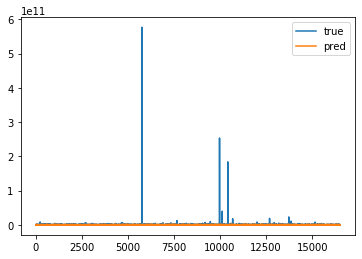

In [634]:
results.plot()

In [718]:
df_1.columns

Index(['oft_codigo', 'lotcodigo', 'nombre_barrio', 'oft_tipo_inmueble',
       'oft_tipo_norma_juridica', 'oic_area_terreno', 'oic_area_construccion',
       'oic_valor_adm', 'oic_valor_anexos', 'oia_tiene_ascensor',
       'oia_cant_garajes', 'vfventa2020', 'codigo_con', 'codigo_res', 'x', 'y',
       'd_park', 'd_highway', 'd_bikeway', 'd_ssf', 'd_mus', 'd_lib', 'd_sitp',
       'd_tm', 'd_p_tm', 'd_gy', 'd_ies', 'd_bom', 'd_col', 'd_ips',
       'dm_bikeway', 'dm_bom', 'dm_col', 'dm_gy', 'dm_highway', 'dm_ies',
       'dm_ips', 'dm_lib', 'dm_mus', 'dm_park', 'dm_p_tm', 'dm_sitp', 'dm_ssf',
       'dm_tm', 'loccodigo', 'locnombre', 'z', 'barmanpre', 'preczhf', 'suelo',
       'actividad', 'tratamiento_urb', 'topografia', 'serpub', 'serpub_tipo',
       'serpub_especif', 'via', 'clase_via', 'estado_via', 'influencia_via',
       'actividad_economica', 'actividad_economica_tipo',
       'tipo_segun_actividad', 'manzana_id', 'cp_terr_ar', 'avaluo_com',
       'avaluo_cat', 'log_vfventa2

In [877]:
ignore = ['oft_codigo', 'lotcodigo', 'manzana_id', 'prevetustz', 'oia_tiene_ascensor', 'oic_valor_adm', 'oic_valor_anexos', 
          'preczhf', 'codigo_con', 'codigo_res', 'loccodigo', 'barmanpre', 'nombre_barrio', 'locnombre',
          'avaluo_com', 'avaluo_cat', 'oic_area_terreno', 'oic_area_construccion', 'estado_via', 'clase_via',
          'nombre_barrio', 'dm_mus']

only = ['estrato', 'x', 'y', 'topografia', 'd_tm', 'd_col', 'oft_tipo_inmueble', 'd_highway', 'oft_tipo_norma_juridica', 'sqrt_oic_area_terreno',
        'oia_cant_garajes', 'cp_terr_ar', 'influencia_via', 'suelo', 'd_p_tm', 'd_bom', 'd_mus',
        'sqrt_oic_area_construccion', 'log_vfventa2020', 'vfventa2020']

df_1_ = df_1.copy().drop(ignore, axis=1)

df_1_ = df_1_[(df_1.log_vfventa2020 < 22) & (df_1.log_vfventa2020 > 16) & (df_1.sqrt_oic_area_construccion < 50) &
                (df_1.sqrt_oic_area_terreno < 50)]

df_1_.dropna(inplace=True)

X = df_1_[only].drop(['vfventa2020', 'log_vfventa2020'], axis=1)

X.astype({'estrato':float})
X = pd.get_dummies(X)
y = df_1_[['vfventa2020']]
X

,estrato,x,y,d_tm,d_col,d_highway,sqrt_oic_area_terreno,oia_cant_garajes,d_p_tm,d_bom,d_mus,sqrt_oic_area_construccion,topografia_1,topografia_2,topografia_3,oft_tipo_inmueble_Apartaestudio,oft_tipo_inmueble_Apartamento,oft_tipo_inmueble_Bodega,oft_tipo_inmueble_Casa,oft_tipo_inmueble_Casa uso mixto,oft_tipo_inmueble_Deposito,oft_tipo_inmueble_Edificio,oft_tipo_inmueble_Garaje,oft_tipo_inmueble_Inmueble comercial,oft_tipo_inmueble_Local,oft_tipo_inmueble_Lote,oft_tipo_inmueble_Oficina,oft_tipo_inmueble_Otros,oft_tipo_inmueble_Parqueadero,oft_tipo_norma_juridica_NPH,oft_tipo_norma_juridica_PH,cp_terr_ar_N,cp_terr_ar_P,influencia_via_0,influencia_via_1,influencia_via_2,influencia_via_3,influencia_via_4,suelo_5,suelo_6
0,5.0,1.001029e+06,1.016411e+06,1631.847033,267.330342,31.022020,1.000000,2,2591.530972,1306.720762,2797.923570,12.421755,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1
1,5.0,1.001029e+06,1.016411e+06,1631.847033,267.330342,31.022020,1.000000,2,2591.530972,1306.720762,2797.923570,12.421755,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1
2,5.0,1.002157e+06,1.007369e+06,335.001609,491.935033,80.395866,1.000000,2,7184.778515,1691.440905,425.246626,8.810789,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1
3,5.0,1.001184e+06,1.011152e+06,449.852551,324.595001,197.631985,1.000000,2,5006.047133,2954.407099,2548.295866,9.721111,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1
4,6.0,1.002798e+06,1.010680e+06,413.261916,279.132676,124.598558,1.000000,2,6693.263262,4075.981245,1879.858494,11.340194,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86966,3.0,9.992487e+05,9.981240e+05,697.007311,56.462664,196.691247,14.212670,1,2082.359357,2133.685567,510.868103,20.203960,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
86967,3.0,9.992839e+05,9.980533e+05,761.112292,13.154281,165.635066,14.142136,3,2056.286387,2156.473259,443.938434,11.891173,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
86968,2.0,9.890125e+05,1.004860e+06,1524.551148,119.288128,480.153439,8.485281,0,1282.975411,2846.375223,7552.977090,12.002500,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
86969,2.0,9.890178e+05,1.004863e+06,1521.493863,113.291148,480.632058,8.485281,1,1284.104835,2845.263212,7547.942590,8.402381,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1


In [878]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [879]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
y_train = ss.fit_transform(y_train)

In [916]:
rgr = RandomForestRegressor(n_estimators=20)

In [917]:
rgr.fit(X_train, y_train)

D:\Programas\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [919]:
y_pred = ss.inverse_transform(rgr.predict(X_test))
#y_test = np.exp(y_test)

In [920]:
np.sqrt(mean_squared_error(y_pred, y_test))

140591592.08445957

In [921]:
print('Accuracy de validación')
round(r2_score(y_test, y_pred), 3)

Accuracy de validación


0.86

In [922]:
print('Accuracy de entrenamiento')
round(r2_score(y_train, rgr.predict(X_train)), 3)

Accuracy de entrenamiento


0.977

In [898]:
from sklearn.model_selection import cross_val_score

In [904]:
scores_R = cross_val_score(rgr, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_R.mean(), scores_R.std() * 2))

D:\Programas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed

Accuracy: 0.81 (+/- 0.09)


In [909]:
results = pd.DataFrame({'true':y_test.values.reshape(1, -1)[0], 'pred':y_pred})

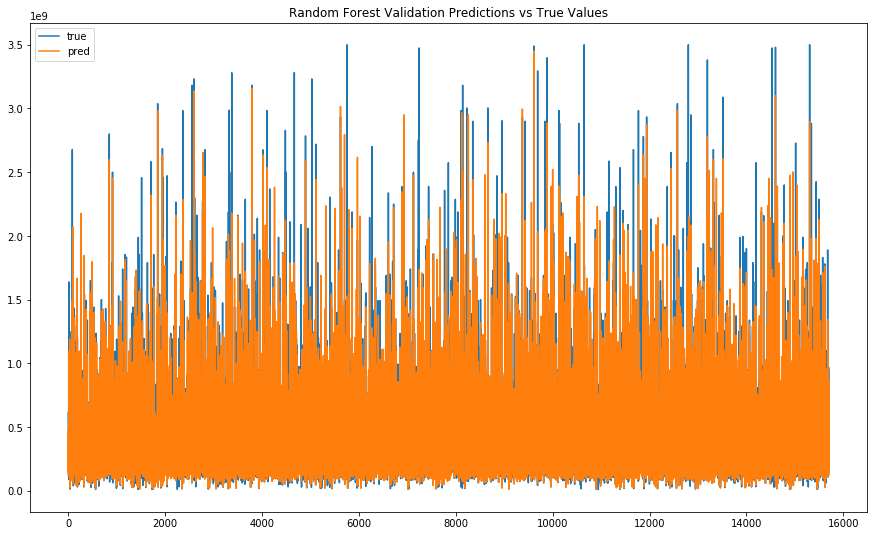

In [912]:
results.plot(figsize=(15, 9), title='Random Forest Validation Predictions vs True Values')

In [924]:
xgb = XGBRegressor()

In [925]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [927]:
y_pred = ss.inverse_transform(xgb.predict(X_test))
#y_test = np.exp(y_test)

In [928]:
np.sqrt(mean_squared_error(y_pred, y_test))

145174970.42383832

In [929]:
print('Accuracy de validación')
round(r2_score(y_test, y_pred), 3)

Accuracy de validación


0.851

In [931]:
print('Accuracy de entrenamiento')
round(r2_score(y_train, xgb.predict(X_train)), 3)

Accuracy de entrenamiento


0.924

In [898]:
from sklearn.model_selection import cross_val_score

In [932]:
scores_R = cross_val_score(xgb, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_R.mean(), scores_R.std() * 2))

Accuracy: 0.82 (+/- 0.07)


In [933]:
results = pd.DataFrame({'true':y_test.values.reshape(1, -1)[0], 'pred':y_pred})

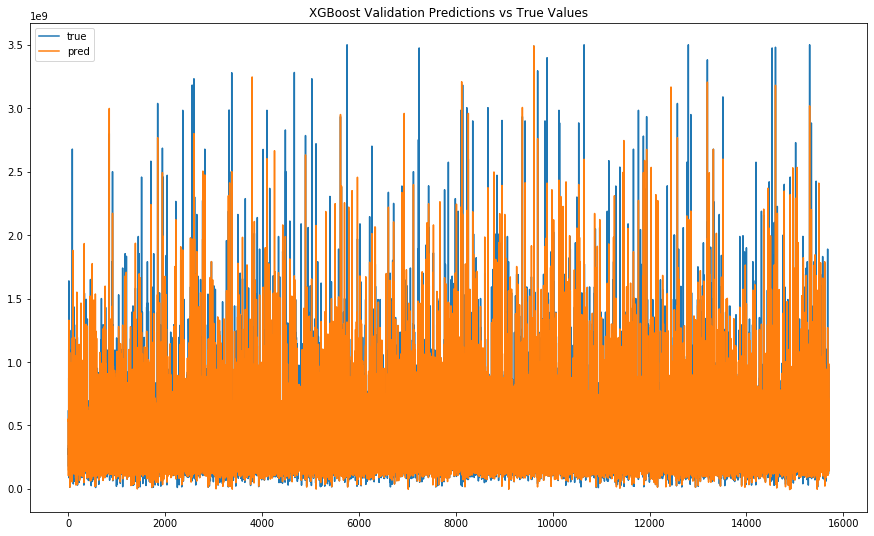

In [944]:
results.plot(figsize=(15, 9), title='XGBoost Validation Predictions vs True Values')

In [936]:
gbr = GradientBoostingRegressor()

In [937]:
gbr.fit(X_train, y_train)

D:\Programas\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [939]:
y_pred = ss.inverse_transform(gbr.predict(X_test))
#y_test = np.exp(y_test)

In [940]:
np.sqrt(mean_squared_error(y_pred, y_test))

166318909.77906564

In [941]:
print('Accuracy de validación')
round(r2_score(y_test, y_pred), 3)

Accuracy de validación


0.804

In [942]:
print('Accuracy de entrenamiento')
round(r2_score(y_train, gbr.predict(X_train)), 3)

Accuracy de entrenamiento


0.82

In [898]:
from sklearn.model_selection import cross_val_score

In [943]:
scores_R = cross_val_score(gbr, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_R.mean(), scores_R.std() * 2))

D:\Programas\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programas\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programas\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programas\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

Accuracy: 0.79 (+/- 0.06)


In [945]:
results = pd.DataFrame({'true':y_test.values.reshape(1, -1)[0], 'pred':y_pred})

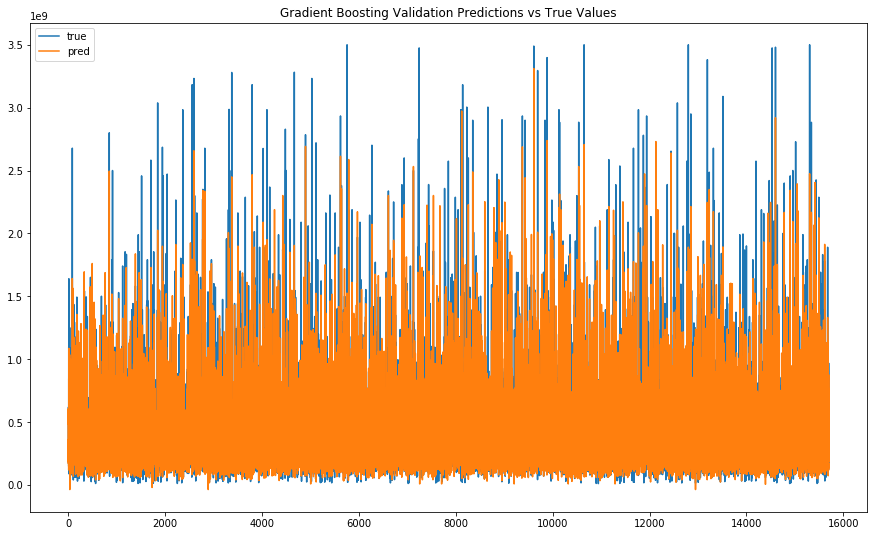

In [946]:
results.plot(figsize=(15, 9), title='Gradient Boosting Validation Predictions vs True Values')